In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-50-turkish-songs-on-spotify-2020/Top-50-Turkish-Songs.csv


In [2]:
data = pd.read_csv('/kaggle/input/top-50-turkish-songs-on-spotify-2020/Top-50-Turkish-Songs.csv')

In [3]:
data.info()  #concise summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     50 non-null     object 
 1   artist    50 non-null     object 
 2   genre     46 non-null     object 
 3   added     50 non-null     object 
 4   bpm       50 non-null     int64  
 5   energy    50 non-null     int64  
 6   dance     50 non-null     int64  
 7    dB       50 non-null     int64  
 8   live      50 non-null     int64  
 9   val       50 non-null     int64  
 10  duration  50 non-null     int64  
 11  acoustic  50 non-null     int64  
 12  spch      49 non-null     float64
 13  pop       50 non-null     int64  
 14  daily     50 non-null     float64
dtypes: float64(2), int64(9), object(4)
memory usage: 6.0+ KB


In [4]:
data.shape #returns the shape of a dataframe

(50, 15)

In [5]:
data.head() #Getting the first 5 rows

,title,artist,genre,added,bpm,energy,dance,dB,live,val,duration,acoustic,spch,pop,daily
0,Melek,Reynmen,turkish hip hop,1970‑01‑01,180,64,57,-5,24,28,155,15,6.0,80,235.590
1,Seni dert etmeler,Madrigal,turkish alt pop,1970‑01‑01,88,61,55,-11,33,88,189,15,3.0,77,207.925
2,Kusura bakma,Tuğkan,NaN,1970‑01‑01,124,26,44,-17,14,59,156,74,4.0,71,189.790
3,Allahından bul,Ezhel,turkish hip hop,1970‑01‑01,108,49,89,-7,10,52,181,20,6.0,78,181.019
4,Bir sebebi var,İkilem,turkish alt pop,1970‑01‑01,80,53,77,-8,9,68,210,38,3.0,72,167.823


In [6]:
data.tail() #Getting the last 5 rows

,title,artist,genre,added,bpm,energy,dance,dB,live,val,duration,acoustic,spch,pop,daily
45,Nirvana,Gulsen,deep turkish pop,1970‑01‑01,98,64,76,-7,9,55,139,3,13.0,69,62.538
46,Whoopty,CJ,NaN,1970‑01‑01,140,60,71,-8,15,74,123,19,18.0,94,62.348
47,Sarilirim birine,Adamlar,turkish rock,1970‑01‑01,130,71,63,-8,25,33,393,19,3.0,68,61.602
48,LINK UP,Ezhel,turkish hip hop,1970‑01‑01,140,60,85,-6,15,50,194,40,15.0,70,60.620
49,Yanginlar,Canbay&Wolker,turkish hip hop,1970‑01‑01,105,72,82,-6,10,13,177,41,18.0,69,60.174


In [7]:
data.dtypes

title        object
artist       object
genre        object
added        object
bpm           int64
energy        int64
dance         int64
 dB           int64
live          int64
val           int64
duration      int64
acoustic      int64
spch        float64
pop           int64
daily       float64
dtype: object

In [8]:
data['bpm'].value_counts(dropna = False)    #Object containing counts of unique values

140    4
98     3
104    2
88     2
156    2
95     2
100    2
130    2
180    2
112    1
117    1
132    1
133    1
135    1
160    1
122    1
77     1
80     1
85     1
87     1
120    1
90     1
91     1
94     1
110    1
96     1
172    1
124    1
115    1
165    1
102    1
103    1
162    1
105    1
170    1
171    1
108    1
189    1
Name: bpm, dtype: int64

In [9]:
data.columns

Index(['title', 'artist', 'genre', 'added', 'bpm', 'energy', 'dance', ' dB',
       'live', 'val', 'duration', 'acoustic', 'spch', 'pop', 'daily'],
      dtype='object')

In [10]:
data.describe()   #viewing some basic statistical details

,bpm,energy,dance,dB,live,val,duration,acoustic,spch,pop,daily
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,49.000000,50.000000,50.00000
mean,121.740000,58.360000,65.760000,-7.860000,14.420000,45.480000,195.74000,25.500000,8.836735,72.360000,99.38680
std,30.623327,12.984701,14.024119,2.449573,10.085532,22.281355,49.34502,25.754136,6.332282,7.156444,41.52604
min,77.000000,26.000000,35.000000,-17.000000,6.000000,12.000000,119.00000,0.000000,3.000000,59.000000,60.17400
25%,98.000000,51.500000,56.000000,-9.000000,9.000000,28.500000,164.75000,6.000000,4.000000,70.000000,69.15225
50%,113.500000,60.500000,67.500000,-7.500000,11.000000,42.500000,189.00000,19.000000,6.000000,71.000000,85.61250
75%,140.000000,64.750000,77.000000,-6.000000,15.000000,59.750000,211.75000,35.500000,13.000000,74.000000,113.83900
max,189.000000,87.000000,93.000000,-4.000000,66.000000,97.000000,393.00000,137.000000,29.000000,97.000000,235.59000


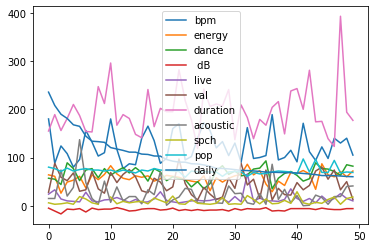

In [11]:
data.plot() #Plotting data
plt.show()

In [12]:
data.corr()  #correlation

,bpm,energy,dance,dB,live,val,duration,acoustic,spch,pop,daily
bpm,1.000000,0.039862,-0.382304,0.072590,0.150356,-0.227305,0.134090,-0.040898,0.047906,0.149432,-0.004770
energy,0.039862,1.000000,0.144721,0.582262,0.336990,0.104635,0.243494,-0.374830,0.183768,-0.131000,-0.168998
dance,-0.382304,0.144721,1.000000,0.385956,0.048775,0.263449,-0.259758,-0.230255,0.253453,0.030160,-0.098191
dB,0.072590,0.582262,0.385956,1.000000,0.062005,-0.056970,-0.010161,-0.283543,0.272835,0.006380,-0.188348
live,0.150356,0.336990,0.048775,0.062005,1.000000,-0.060945,0.026305,-0.077667,0.185357,-0.176031,0.072517
val,-0.227305,0.104635,0.263449,-0.056970,-0.060945,1.000000,-0.000163,-0.157870,-0.036533,0.190106,0.153274
duration,0.134090,0.243494,-0.259758,-0.010161,0.026305,-0.000163,1.000000,-0.055347,-0.173997,-0.196509,-0.146763
acoustic,-0.040898,-0.374830,-0.230255,-0.283543,-0.077667,-0.157870,-0.055347,1.000000,0.055038,-0.026132,0.253758
spch,0.047906,0.183768,0.253453,0.272835,0.185357,-0.036533,-0.173997,0.055038,1.000000,-0.031880,-0.162614
pop,0.149432,-0.131000,0.030160,0.006380,-0.176031,0.190106,-0.196509,-0.026132,-0.031880,1.000000,0.166101


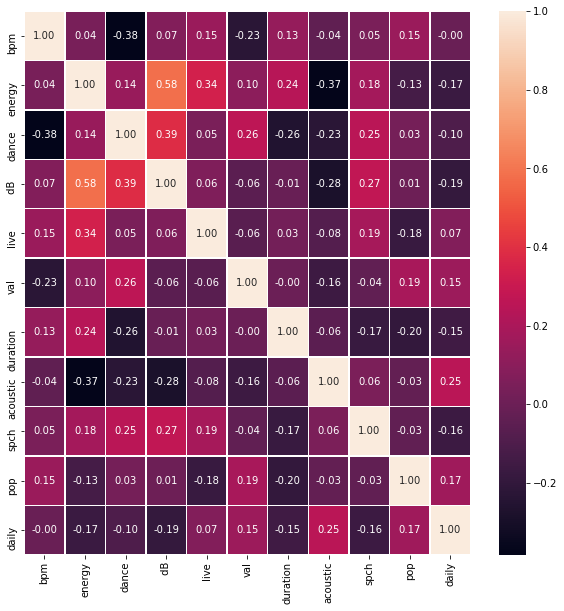

In [13]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot = True , linewidth = .5, fmt = '.2f',ax = ax)  #Correlation heatmap
plt.show()

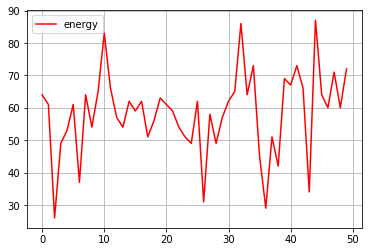

In [14]:
data.energy.plot(kind = "line", color = "red",grid = True ,label="energy")
plt.legend()                                                                  #Line plot
plt.show()

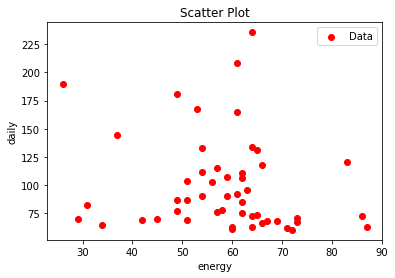

In [15]:

plt.scatter(data.energy,data.daily,color = "red",label = "Data")
plt.xlabel("energy")
plt.ylabel("daily")                                                  #Scatter Plot
plt.title("Scatter Plot")
plt.legend()
plt.show()

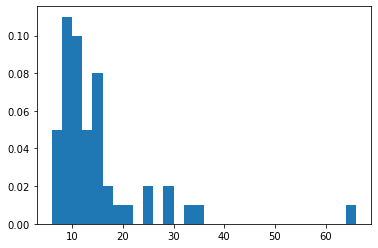

In [16]:
plt.hist(data.live, bins = 30,density = True)    #Histogram plot
plt.show()                    

In [17]:
data.loc[1:10,"artist":"dance"]               #Slicing Data

,artist,genre,added,bpm,energy,dance
1,Madrigal,turkish alt pop,1970‑01‑01,88,61,55
2,Tuğkan,NaN,1970‑01‑01,124,26,44
3,Ezhel,turkish hip hop,1970‑01‑01,108,49,89
4,İkilem,turkish alt pop,1970‑01‑01,80,53,77
5,Contra,turkish hip hop,1970‑01‑01,96,61,52
6,Emir Taha,turkish trap pop,1970‑01‑01,156,37,74
7,Bilal Sonses,turkish trap pop,1970‑01‑01,132,64,77
8,Pinhani,oyun havasi,1970‑01‑01,103,54,58
9,UZI,turkish trap pop,1970‑01‑01,110,65,77
10,Gazapizm,turkish hip hop,1970‑01‑01,180,83,63


In [18]:
filter1 = data.daily < 100.000            #Filtering Data
data[filter1]

,title,artist,genre,added,bpm,energy,dance,dB,live,val,duration,acoustic,spch,pop,daily
19,Toy,Mabel Matiz,karadeniz halk muzigi,1970‑01‑01,98,63,52,-8,11,31,195,1,6.0,73,95.815
20,Sallan,Xir,turkish hip hop,1970‑01‑01,160,61,60,-5,8,39,195,12,20.0,72,92.400
21,Uzunlar- V1,Evdeki Saat,turkish alt pop,1970‑01‑01,170,59,56,-10,6,97,282,18,4.0,71,90.400
22,Dunyadan uzak,Sakiler,NaN,1970‑01‑01,95,54,54,-8,8,46,218,36,3.0,59,90.315
23,Uzak ol,Diyar Pala,turkish hip hop,1970‑01‑01,102,51,39,-10,10,23,178,34,13.0,72,87.105
24,Olumun kuzeni,ceg,turkish hip hop,1970‑01‑01,140,49,50,-8,11,12,119,6,5.0,70,86.599
25,Dargin,Zeynep Bastik,turkish pop,1970‑01‑01,172,62,35,-10,10,38,242,5,4.0,71,84.626
26,Beni kendinden kurtar,Perdenin Ardindakiler,turkish alt pop,1970‑01‑01,156,31,46,-9,11,24,206,61,3.0,70,81.928
27,Ben gibi bakmaz,Lia Shine,turkish hip hop,1970‑01‑01,120,58,72,-9,14,13,211,6,5.0,70,77.536
28,First Class,ceg,turkish hip hop,1970‑01‑01,133,49,83,-8,15,18,207,5,17.0,61,77.295


In [19]:
data_filter1 = data.bpm > 120
data_filter2 = data.duration > 200            #Combining Filters
data[data_filter1 & data_filter2]

,title,artist,genre,added,bpm,energy,dance,dB,live,val,duration,acoustic,spch,pop,daily
10,Unutulacak dunler,Gazapizm,turkish hip hop,1970‑01‑01,180,83,63,-7,13,69,296,7,18.0,74,120.585
16,Yildizlara bak,Yasli Amca,turkish alternative rock,1970‑01‑01,165,62,51,-6,8,27,241,33,4.0,72,106.347
21,Uzunlar- V1,Evdeki Saat,turkish alt pop,1970‑01‑01,170,59,56,-10,6,97,282,18,4.0,71,90.400
25,Dargin,Zeynep Bastik,turkish pop,1970‑01‑01,172,62,35,-10,10,38,242,5,4.0,71,84.626
26,Beni kendinden kurtar,Perdenin Ardindakiler,turkish alt pop,1970‑01‑01,156,31,46,-9,11,24,206,61,3.0,70,81.928
28,First Class,ceg,turkish hip hop,1970‑01‑01,133,49,83,-8,15,18,207,5,17.0,61,77.295
36,Sar bu sehri,Canozan,turkish alt pop,1970‑01‑01,189,29,35,-11,10,12,204,86,4.0,70,69.420
47,Sarilirim birine,Adamlar,turkish rock,1970‑01‑01,130,71,63,-8,25,33,393,19,3.0,68,61.602


In [20]:
def div(n):
    return n/2                  #Using function

data.energy.apply(div)

0     32.0
1     30.5
2     13.0
3     24.5
4     26.5
5     30.5
6     18.5
7     32.0
8     27.0
9     32.5
10    41.5
11    33.0
12    28.5
13    27.0
14    31.0
15    29.5
16    31.0
17    25.5
18    28.0
19    31.5
20    30.5
21    29.5
22    27.0
23    25.5
24    24.5
25    31.0
26    15.5
27    29.0
28    24.5
29    28.5
30    31.0
31    32.5
32    43.0
33    32.0
34    36.5
35    22.5
36    14.5
37    25.5
38    21.0
39    34.5
40    33.5
41    36.5
42    33.0
43    17.0
44    43.5
45    32.0
46    30.0
47    35.5
48    30.0
49    36.0
Name: energy, dtype: float64

In [21]:
data.live.apply(lambda n: n/2)    #Using lambda function

0     12.0
1     16.5
2      7.0
3      5.0
4      4.5
5      4.0
6     14.0
7      5.0
8      4.0
9      6.0
10     6.5
11     8.5
12     6.0
13     3.5
14     6.5
15     3.5
16     4.0
17     7.0
18    14.5
19     5.5
20     4.0
21     3.0
22     4.0
23     5.0
24     5.5
25     5.0
26     5.5
27     7.0
28     7.5
29     3.5
30     9.5
31     4.0
32    33.0
33     4.5
34     8.0
35     5.0
36     5.0
37     4.5
38     6.5
39    17.5
40     7.5
41     4.5
42     7.5
43     3.0
44    10.0
45     4.5
46     7.5
47    12.5
48     7.5
49     5.0
Name: live, dtype: float64

In [22]:
data.groupby("acoustic").mean()       #Grouping

,bpm,energy,dance,dB,live,val,duration,spch,pop,daily
acoustic,,,,,,,,,,
0,171.000000,73.00,51.00,-6.00,9.000000,33.000000,200.000000,6.00,97.00,66.926000
1,105.000000,64.50,54.00,-7.00,13.000000,36.500000,238.000000,4.50,71.50,80.857500
3,100.750000,56.75,75.75,-6.50,9.000000,54.750000,173.000000,10.75,69.75,84.348000
4,140.000000,59.00,69.00,-7.00,7.000000,31.000000,141.000000,9.00,74.00,107.100000
5,152.500000,55.50,59.00,-9.00,12.500000,28.000000,224.500000,10.50,66.00,80.960500
6,134.250000,65.50,64.25,-7.25,31.500000,22.500000,187.750000,9.00,67.75,76.396000
7,180.000000,83.00,63.00,-7.00,13.000000,69.000000,296.000000,18.00,74.00,120.585000
10,77.000000,57.00,79.00,-7.00,12.000000,65.000000,189.000000,9.00,74.00,114.736000
12,160.000000,61.00,60.00,-5.00,8.000000,39.000000,195.000000,20.00,72.00,92.400000


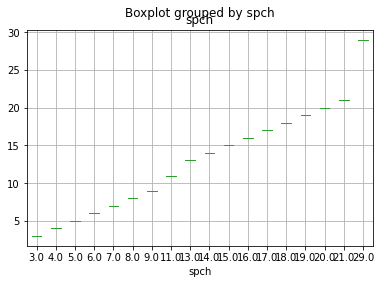

In [23]:
data.boxplot(column = "spch" , by = "spch")        #Boxplot
plt.show()

In [24]:
#Melting data
data1 = data.head()
melted = pd.melt(frame = data1,id_vars = "title",value_vars = ["energy" , "val"])
melted

,title,variable,value
0,Melek,energy,64
1,Seni dert etmeler,energy,61
2,Kusura bakma,energy,26
3,Allahından bul,energy,49
4,Bir sebebi var,energy,53
5,Melek,val,28
6,Seni dert etmeler,val,88
7,Kusura bakma,val,59
8,Allahından bul,val,52
9,Bir sebebi var,val,68


In [25]:
data1 = data.head()          #Concatenating data
data2 = data.tail()                             

conc_data = pd.concat([data1,data2], axis=0 ,ignore_index= True,) 
conc_data

,title,artist,genre,added,bpm,energy,dance,dB,live,val,duration,acoustic,spch,pop,daily
0,Melek,Reynmen,turkish hip hop,1970‑01‑01,180,64,57,-5,24,28,155,15,6.0,80,235.590
1,Seni dert etmeler,Madrigal,turkish alt pop,1970‑01‑01,88,61,55,-11,33,88,189,15,3.0,77,207.925
2,Kusura bakma,Tuğkan,NaN,1970‑01‑01,124,26,44,-17,14,59,156,74,4.0,71,189.790
3,Allahından bul,Ezhel,turkish hip hop,1970‑01‑01,108,49,89,-7,10,52,181,20,6.0,78,181.019
4,Bir sebebi var,İkilem,turkish alt pop,1970‑01‑01,80,53,77,-8,9,68,210,38,3.0,72,167.823
5,Nirvana,Gulsen,deep turkish pop,1970‑01‑01,98,64,76,-7,9,55,139,3,13.0,69,62.538
6,Whoopty,CJ,NaN,1970‑01‑01,140,60,71,-8,15,74,123,19,18.0,94,62.348
7,Sarilirim birine,Adamlar,turkish rock,1970‑01‑01,130,71,63,-8,25,33,393,19,3.0,68,61.602
8,LINK UP,Ezhel,turkish hip hop,1970‑01‑01,140,60,85,-6,15,50,194,40,15.0,70,60.620
9,Yanginlar,Canbay&Wolker,turkish hip hop,1970‑01‑01,105,72,82,-6,10,13,177,41,18.0,69,60.174
